# Exercise 13 - Analyze class homeworks

## Integrantes:
* Diana Díaz - Cod. 201331684 
* Carlos Silva - Cod. 201920463 
* Javier Lesmes - Cod. 200820243

## Análisis preliminar y preparación de los datos

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/Consolidado_respuestas_escribir_v2.xlsx', encoding='UTF-8')
data.head(7)

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",NaN,Los microservicios son servicios web con alcan...,NaN
6,M,NaN,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",NaN


### A. Análisis descriptivo de los datos

Los datos continen información de 6  tareas y el género (7 variables en total l) de los 46 estudiantes de la Clase "Modelos Avanzados 1", donde el 21.7% son mujeres y el 78.26% son hombres. En relación con las tareas, se encuentra que la tarea menos realizada fue la E11 (NLP).En general, se tienen Missing value en todas las columnas. Igualmente, se encuentra que algunas tareas fueron realizadas en español (es) y otras en inglés (en). La redacción en español es la mayoría en todos lo casos, con excepción de la tarea E11, que como ya se mencionó fue la tarea con mayor cantidad de missing values, los cuales fueron categorizados como "otro".

In [2]:
data.shape

(46, 7)

In [3]:
data.isnull().sum()

Genero                                         0
E1 - Examples of Time Series Analysis          2
E4 - Panel Data                                2
E6 - Decison Trees                             4
E8 - Ensemble Trees Overview                   8
E10 - REST-API                                 1
E11 - Natural Language Processing Overview    30
dtype: int64

In [4]:
data['Genero'].value_counts()/46*100

M    78.26087
F    21.73913
Name: Genero, dtype: float64

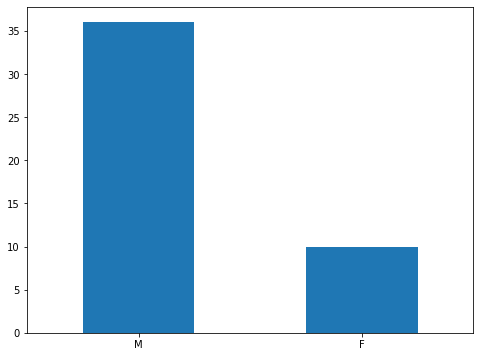

In [5]:
pd.Series(data["Genero"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0);

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier as RFC
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from langdetect import detect

In [7]:
data =data.rename(columns={"E1 - Examples of Time Series Analysis": "E1",
                     "E4 - Panel Data": "E4", 
                     "E6 - Decison Trees":"E6",
                     "E8 - Ensemble Trees Overview":"E8", 
                     "E10 - REST-API":"E10",
                     "E11 - Natural Language Processing Overview": "E11"});

In [8]:
#Detección idioma de la tarea
for j in data.columns[1:]:
  data[j+ '  lang']=np.zeros(len(data.index))

for j in range(7,13):
  for i in range(0, len(data.index)):
      try:
        temp=data.loc[i,data.columns[j-6]]
        lang = detect(temp)
        data.loc[i,data.columns[j]]=lang
      except:
        data.loc[i,data.columns[j]]='otro'

In [9]:
data.head(3)

,Genero,E1,E4,E6,E8,E10,E11,E1 lang,E4 lang,E6 lang,E8 lang,E10 lang,E11 lang
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN,en,en,en,en,es,otro
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN,es,es,es,es,es,otro
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r...",es,otro,es,en,es,en


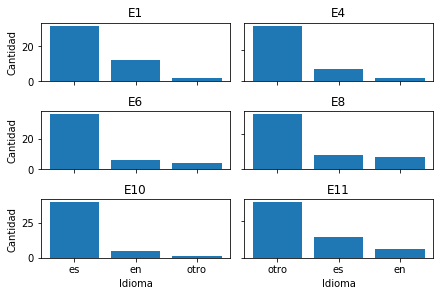

In [10]:
#Gráfico Tareas por idioma
fig, axs = plt.subplots(3, 2, constrained_layout=True)
axs[0, 0].bar(data['E1  lang'].value_counts().index, data['E1  lang'].value_counts());
axs[0, 0].set_title('E1')
axs[0, 1].bar(data['E4  lang'].value_counts().index, data['E4  lang'].value_counts());
axs[0, 1].set_title('E4')
axs[1, 0].bar(data['E6  lang'].value_counts().index, data['E6  lang'].value_counts());
axs[1, 0].set_title('E6')
axs[1, 1].bar(data['E8  lang'].value_counts().index, data['E8  lang'].value_counts());
axs[1, 1].set_title('E8')
axs[2, 0].bar(data['E10  lang'].value_counts().index, data['E10  lang'].value_counts());
axs[2, 0].set_title('E10')
axs[2, 1].bar(data['E11  lang'].value_counts().index, data['E11  lang'].value_counts());
axs[2, 1].set_title('E11')

for ax in axs.flat:
    ax.set(xlabel='Idioma', ylabel='Cantidad')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Nota: La categoría "otro" hace referencia a los missing values.

### B. Traducción de los textos de inglés a español


Teniendo en cuenta que existen textos tanto inglés como español, se incia con la traducción de los textos de inglés a español para faciliar el desarrollo del análisis propuesto. La traducción de todos los textos a español se realiza dado que es el idioma en el que están la mayoría de los textos.

In [11]:
#!pip install googletrans

In [12]:
import pandas as pd
import googletrans
from googletrans import Translator
translator = Translator()

ModuleNotFoundError: No module named 'googletrans'

In [13]:
data = data.iloc[:,[0,1,2,3,4,5,6]]
data.head()

,Genero,E1,E4,E6,E8,E10,E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [14]:
data.shape

(46, 7)

In [15]:
# listado de idiomas
lang_df = pd.DataFrame.from_dict(googletrans.LANGUAGES,  orient='index', columns=['Language'])
lang_df[lang_df.Language.isin(['english', 'spanish'])] # podemos ver los términos para llamar los idiomas que nos interesan

NameError: name 'googletrans' is not defined

In [16]:
 # quitamos los carácteres especiales en toda la data
cols = ['E1', 'E4', 'E6', 'E8', 'E10', 'E11']
data[cols] = data[cols].replace('[)°<&/*\n\t0123456789=,.:–(]','', regex=True)

In [17]:
data=data.fillna('_') # para que la traducción se logre reemplazamos temporalmente los espacios en blanco por un _

In [18]:
#realizamos la traducción de todas la columnas pasar a español
data['E1'] = data['E1'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))
data['E4'] = data['E4'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))
data['E6'] = data['E6'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))
data['E8'] = data['E8'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))
data['E10'] = data['E10'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))
data['E11'] = data['E11'].apply(translator.translate,src='en',dest='es').apply(getattr, args=('text',))

NameError: name 'translator' is not defined

# Exercise 13.1

Analyze the writing patterns of each student

El **análisis de los patrones de escritura** para cada uno los estudiantes se abordará desde dos aspectos: cantidad de palabras y palabras más frecuentes en las tareas realizadas.

### A. Cantidad de Palabras

In [19]:
#Conteo de la cantidad de palabras por tarea para cada uno de los estudiantes
for j in data.columns[1:]:
  data[j+ 'q']=np.zeros(len(data.index))

In [20]:
for j in range(1,7):
  for i in range(0, len(data.index)):
      try:
        data.loc[i,data.columns[j+6]] = sum(1 for word in (data.loc[i,data.columns[j]]).split() if word.isalpha())
      except:
        data.loc[i,data.columns[j+6]]=0

In [21]:
data

,Genero,E1,E4,E6,E8,E10,E11,E1q,E4q,E6q,E8q,E10q,E11q
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos Los micr...,_,293.0,51.0,314.0,300.0,299.0,0.0
1,F,ANÁLISIS DE SERIES DE TIEMPO USOS El análisis...,Series de Tiempo vs Datos en PanelUna serie de...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONESLos...,ENSAMBLAJE EN MACHINE LEARNINGLos métodos de e...,MicroserviciosEl objetivo principal de la impl...,_,456.0,186.0,314.0,353.0,289.0,0.0
2,M,Una serie de tiempo es una colección de datos ...,_,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,LexisNexis launched Lexis Analytics a legal re...,240.0,0.0,291.0,335.0,330.0,150.0
3,M,Given that Time Series Analysis allows to unde...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,_,327.0,118.0,241.0,353.0,306.0,0.0
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,361.0,218.0,490.0,393.0,336.0,206.0
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,Son modelos supervisados se pueden usar arbole...,_,Los microservicios son servicios web con alcan...,_,334.0,156.0,295.0,0.0,319.0,0.0
6,M,_,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,En machine learning los métodos de ensamble so...,La arquitectura de microservicios o simplement...,_,0.0,286.0,402.0,453.0,329.0,0.0
7,M,El análisis de series de tiempo TSA tiene una ...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,_,271.0,136.0,251.0,314.0,326.0,0.0
8,F,Ejemplo número de estudiantes semestrales ins...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,_,Los microservicios es un tipo de arquitectura ...,_,195.0,87.0,162.0,0.0,103.0,0.0
9,M,Pronósticos de producción análisis de inflació...,Una serie de tiempo contiene observaciones de ...,Arboles de decisión Los árboles de decisión so...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,_,15.0,52.0,246.0,184.0,123.0,0.0


Desde la columna E1q hasta la E11q de la anterior tabla se puede observar la cantidad de palabras que tiene cada una de las tareas realizadas por los estudiantes del curso.

In [22]:
#Principales estadísticas cantiad de palabras
minimo=[]
maximo=[]
mediana=[]

for i in range(0, len(data.index)):
    minimo.append(data.loc[i,data.columns[7:13]].min())
    maximo.append(data.loc[i,data.columns[7:13]].max())
    mediana.append(data.loc[i,data.columns[7:13]].median())

Para tener una visión global de la cantidad de palabras que los estudiantes utilizaron para redactar las tareas solicitadas, a continuación se presentan algunas estadísticas descriptivas. Puntualmente, se presenta la cantidad mínima, máxima y la mediana. Esta última se utiliza dado que, como se verá más adelante, muchos estudiantes tinen al menos una tarea con cero palabras (no enviaron la tarea).

In [23]:
stat=pd.DataFrame(list(zip(minimo,maximo,mediana)),columns =['Min', 'Max','Mediana'])
stat

,Min,Max,Mediana
0,0.0,314.0,296.0
1,0.0,456.0,301.5
2,0.0,335.0,265.5
3,0.0,353.0,273.5
4,206.0,490.0,348.5
5,0.0,334.0,225.5
6,0.0,453.0,307.5
7,0.0,326.0,261.0
8,0.0,195.0,95.0
9,0.0,246.0,87.5


La antarior tabla permite observar que, por ejemplo, para el estudiante 4 el mínimo de palabras con las que escribió una tarea fue de 210 palabras, cumpliendo con la cantidad mínima que se solicitó para las diferentes tareas. Con excepción de la tarea E11, la menor cantidad de palabras que se solicitó para una tarea fue 150 (Tarea E4). En relación con la cantidad máxima, fueron 509 palabras las que utilizó para escribir una de las tareas. Finalmente, para este estudiante la media de las palabras utilizadas en las 6 tareas fue de 357.

Este análisis puede realizarse para cualquiera de los otros estudiantes.

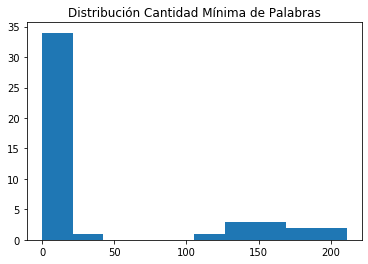

In [24]:
#Distribución cantidad mínima de palabras
plt.hist(stat['Min'])
plt.title('Distribución Cantidad Mínima de Palabras');

La distribución de la cantidad mínima deja ver que muchos de estudiantes no enviaron al menos una tarea, pero también que una cantidad importante de los que enviaron tareas las escribiron con menos de 150 palabras.

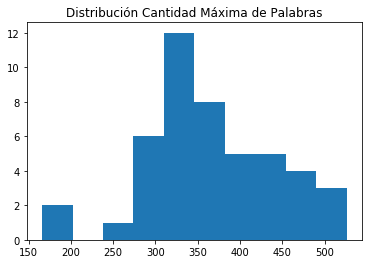

In [25]:
#Distribución cantidad máxima de palabras
plt.hist(stat['Max'])
plt.title('Distribución Cantidad Máxima de Palabras');

La distribución de la cantidad máxima de palabras permite observar que, la mamyor frecuencia se dió alrededor de 350 palabras. Solo 10 estudiantes escrbieron con un máximo inferior a este número.

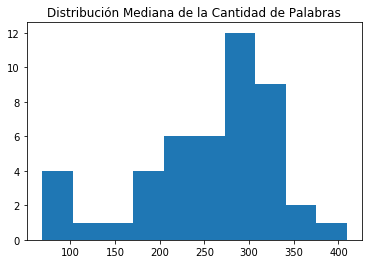

In [26]:
#Distribución mediana de la cantidad de palabras
plt.hist(stat['Mediana'])
plt.title('Distribución Mediana de la Cantidad de Palabras');

En relación con la mediana, su distribución permite observar que en la mayoría de los casos la mediada de las palabras utilizadas en la redacción de las tareas estuvo alrededor de las 300 palabras, que fue la cantidad mínima exigida en 4 de las 6 tareas en análisis.

### B. Palabras más usadas

In [27]:
# se unifican las tareas en la columna union para hacer el análisis a nivel de estudiante
data['union'] = data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
data.head(2)

,Genero,E1,E4,E6,E8,E10,E11,E1q,E4q,E6q,E8q,E10q,E11q,union
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos Los micr...,_,293.0,51.0,314.0,300.0,299.0,0.0,One of the most valuable application of time s...
1,F,ANÁLISIS DE SERIES DE TIEMPO USOS El análisis...,Series de Tiempo vs Datos en PanelUna serie de...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONESLos...,ENSAMBLAJE EN MACHINE LEARNINGLos métodos de e...,MicroserviciosEl objetivo principal de la impl...,_,456.0,186.0,314.0,353.0,289.0,0.0,ANÁLISIS DE SERIES DE TIEMPO USOS El análisis...


In [28]:
df=data['union']
df.head(10)

0    One of the most valuable application of time s...
1    ANÁLISIS DE SERIES DE TIEMPO  USOS El análisis...
2    Una serie de tiempo es una colección de datos ...
3    Given that Time Series Analysis allows to unde...
4    Time Series Analysis is concerned with the stu...
5    A time series is a set of data that is taken i...
6    _ Un paso crucial antes de empezar a predecir ...
7    El análisis de series de tiempo TSA tiene una ...
8    Ejemplo  número de estudiantes semestrales ins...
9    Pronósticos de producción análisis de inflació...
Name: union, dtype: object

El análisis de palabras frecuentes se realiza con y sin stopwords, con n-gramas (1,2) y lematización, entre otros. La lematización ayudára por ejemplo a que palabras con una misma raíz sean consideradas como una sola. Para mejorar el análisis se inicia realizando un ajuste adicional a los datos removiendo puntuación.

In [29]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [30]:
df = df.apply(remove_punctuation)
df.head() # se han eliminado expresiones como el @ y '

0    One of the most valuable application of time s...
1    ANÁLISIS DE SERIES DE TIEMPO  USOS El análisis...
2    Una serie de tiempo es una colección de datos ...
3    Given that Time Series Analysis allows to unde...
4    Time Series Analysis is concerned with the stu...
Name: union, dtype: object

In [31]:
#!pip install nltk
#!pip install lemma
#!pip install Pattern3

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#from pattern.es import lemma
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# define una función que acepta texto y retorna una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

In [34]:
stemmer = SnowballStemmer('spanish')

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [35]:
df = df.apply(stemming) # se dejan las raices de las palabras

In [36]:
#Palabras frecuentes con stopwords
vect = CountVectorizer()
X_dtm1 = vect.fit_transform(df)
temp1 = X_dtm1.todense()
temp1.shape

(46, 5165)

En el siguiente gráfico se pueden observar las palabras (utilizando sus raíces) más frecuentes en las tareas de todos los estudiantes.

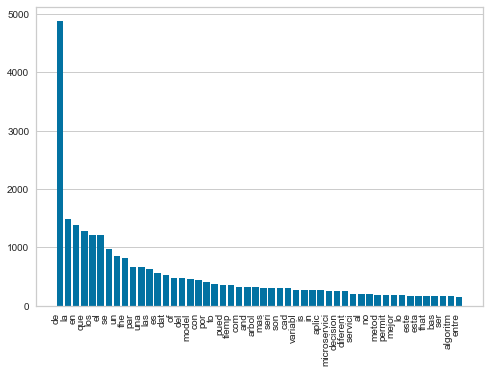

In [134]:
#!pip install yellowbrick
from yellowbrick.text import FreqDistVisualizer;
features1   = vect.get_feature_names()
visualizer1 = FreqDistVisualizer(features=features1, orient='v')
visualizer1.fit(X_dtm1);

Cuando no se eliman las stopwords se encuentra que, en la tarea de todos los estudiantes la palabra más frecuentes es "de", seguida por "la" y "en", palabras que se consideran stopwords; por lo tanto, a continuación se realiza el análisis sin estas palabras y considerando n-gramas (1,2).

In [135]:
sw = stopwords.words('spanish')  #  este es el listado de stopwords en español
np.array(sw)
print("Number of stopwords: ", len(sw)) # este es el número de stopwords en español

Number of stopwords:  313


In [136]:
# A lista actual de stop words le agregamos otras palabras que consideramos no contribuyen en el ánalisis
my_additional_stop_words = ["uso", "usos", "trata", "política", "siguientes", "vale", "pena", "IPC", "ejemplos", "brevemente", "cada", "puede", "pueden", "si", "ser",
                            "solo", "través", "tipo", "cuales"]
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords
spanish_stopwords= spanish_stopwords+my_additional_stop_words
spanish_stopwords;


In [137]:
vect2 = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2))
X_dtm2 = vect2.fit_transform(df)
temp2 = X_dtm2.todense()
temp2.shape

(46, 33934)

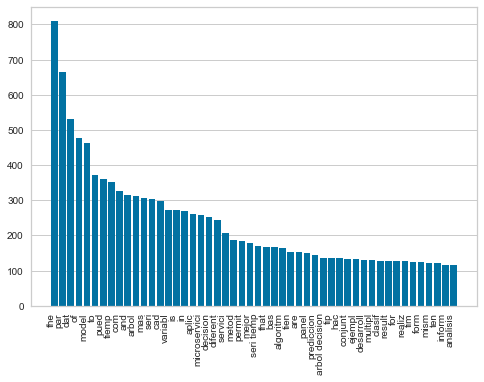

In [138]:
features2   = vect2.get_feature_names()
visualizer2 = FreqDistVisualizer(features=features2, orient='v')
visualizer2.fit(X_dtm2);

Después de eliminar las stopwords, se obtiene que las palabras, o mejor raíces de las palabras, más frecuentes en las tareas de los estudiantes son "par", "dat" y "model", las cuales pueden estar asociadas a parámetros, datos y modelos, y son consistentes con las tareas solicitadas. 

#### Función 'linea' - Palabras frecuentes por estudiante

Ahora bien, para realizar el análisis para las tareas de cada uno de los estudiantes se plantea la función 'line'. Esta función nos permite ver graficamente las 10 palabras más frecuente utilizadas por un estudiante. 

In [139]:
def linea (i):
    estudiante = df[[i]]
    vect = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2))
    X_dtm = vect.fit_transform(estudiante)
    features   = vect.get_feature_names()
    visualizer = FreqDistVisualizer(features=features,n=10, orient='v')
    visualizer.fit(X_dtm)
    #visualizer.show()

A modo de ejemplo, a continuación se muestran las palabras más frecuentes de tres estudiantes de la base de datos.

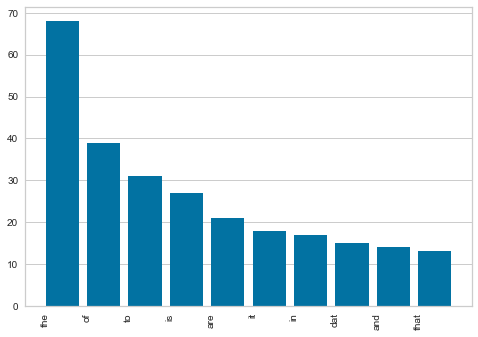

In [140]:
linea(0) # se indica el número de fila del estudiante

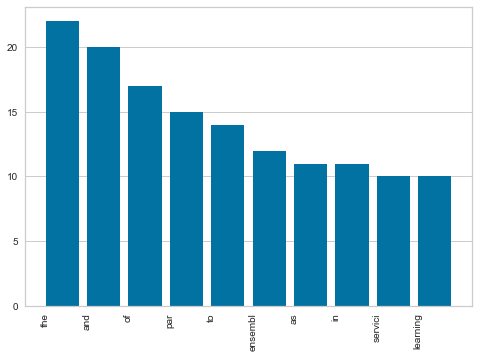

In [141]:
linea(20) # se indica el número de fila del estudiante

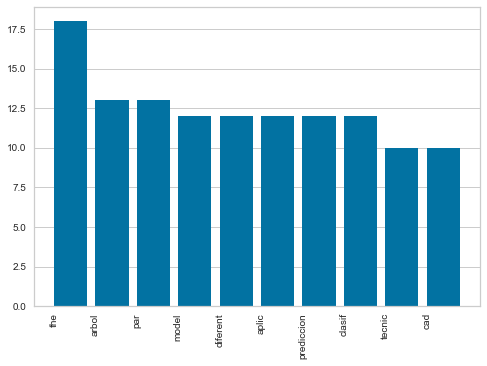

In [142]:
linea(45) # se indica el número de fila del estudiante

En los tres estudiantes presentados se encuentra que la raíz de la palabra más frecuente es todas sus tareas es "para"; sin embargo, la segunda palabra más frecuenta si varia en cada uno de los casos analizados. 

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.

In [143]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

### A. Análisis de similitud a nivel de tareas

Iniciamos el análisis de similitud de las tareas con un análisis descriptivo de cada una de ellas a partir del número de palabras que escribieron los estudiantes que presentaron la respectiva tarea. 

Como se puede observar en la tabla y en los histogramas siguientes el número de palabras fue variado en cada uno de las tareas. En la mayoría de casos, la mayor frecuencia estuvo en el número de palabras mínimo exigido. Por ejemplo, la tarea uno este número eran 300 palabras.

In [144]:
tareas = data[['E1q','E4q','E6q','E8q','E10q','E11q']]
tareas.describe()

,E1q,E4q,E6q,E8q,E10q,E11q
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,288.304348,151.478261,283.347826,258.086957,307.695652,70.891304
std,107.370774,62.678984,119.697065,140.493705,92.500779,115.894632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,274.000000,127.750000,252.750000,193.000000,294.750000,0.000000
50%,302.500000,163.500000,302.000000,314.000000,320.500000,0.000000
75%,334.750000,185.500000,336.500000,352.500000,352.500000,144.000000
max,484.000000,286.000000,526.000000,453.000000,525.000000,408.000000


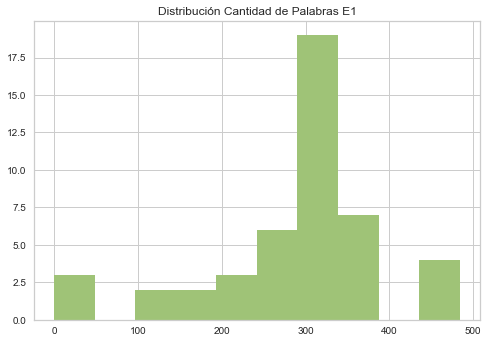

In [145]:
#Distribución cantidad de palabras E1
plt.hist(tareas['E1q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E1');

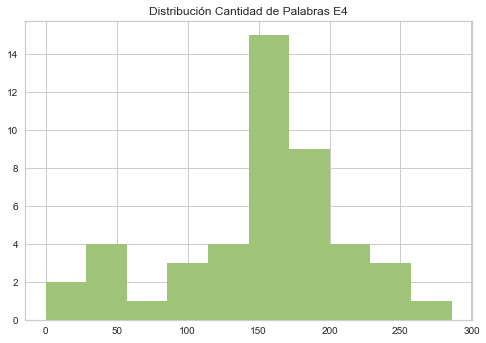

In [146]:
#Distribución cantidad de palabras E4
plt.hist(tareas['E4q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E4');

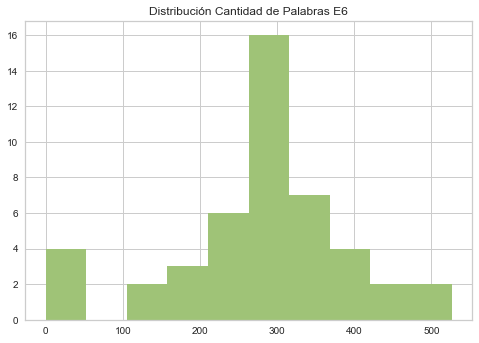

In [147]:
#Distribución cantidad de palabras E6
plt.hist(tareas['E6q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E6');

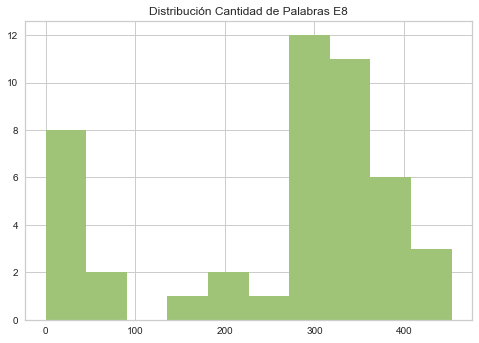

In [148]:
#Distribución cantidad de palabras E8
plt.hist(tareas['E8q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E8');

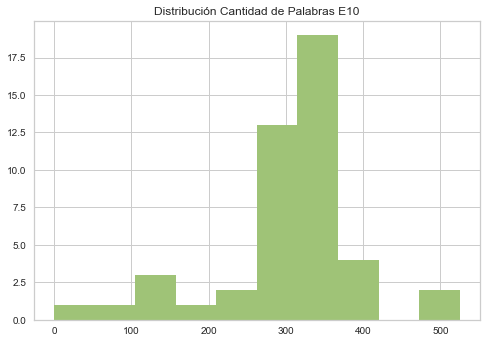

In [149]:
#Distribución cantidad de palabras E10
plt.hist(tareas['E10q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E10');

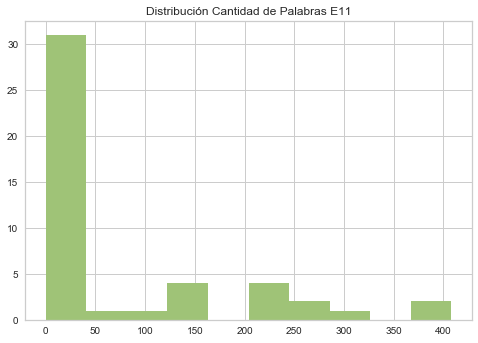

In [150]:
#Distribución cantidad de palabras E11
plt.hist(tareas['E11q'], color = 'g')
plt.title('Distribución Cantidad de Palabras E11');

### - Análisis de similitud

Para analizar que tan parecidas o similares son las respuestas de los estudiantes en cada una de las tareas se utiliza Cosine similarity de Scikit Learn.

#### Análisis Tarea E1.

In [151]:
E1 = data['E1']
E1 = E1.dropna() # se eleminan NA, entonces se debe ser cuidadoso entre el índice y la posición de la matriz de similaridad
E1;

In [152]:
vect_e1 = CountVectorizer(stop_words=spanish_stopwords, max_features=1000) # por default pasa todas las palablas a minuscula (lowercase)
E1_dtm = vect_e1.fit_transform(E1)
temp=E1_dtm.todense()
temp.shape

(46, 1000)

In [153]:
#muestra todas las combianciones del coseno de similaridad de las tareas E1 para los 44 estudiantes que la presentaron
cs_E1 = cosine_similarity(temp,temp)  #esta es una matriz simetrica de similaridad del coseno
cs_E1.shape

(46, 46)

In [154]:
# Dado que la matriz anterior es simétrica, entonces es suficiente con seleccionar la matriz triangular inferior 
import numpy
tri_lower_no_diag = np.tril(cs_E1, k=-1)# matriz triangular inferior
tri_lower_no_diag

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01616986, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01927871, 0.27033837, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02477328, 0.32888687, 0.31369534, ..., 0.        , 0.        ,
        0.        ],
       [0.01287911, 0.28826396, 0.22360296, ..., 0.30452219, 0.        ,
        0.        ],
       [0.76258509, 0.03379221, 0.02544578, ..., 0.02766755, 0.01912389,
        0.        ]])

In [155]:
maxElement = numpy.amax(tri_lower_no_diag)
print('El coseno de similaridad más alto entre dos estudiantes : ', maxElement)

El coseno de similaridad más alto entre dos estudiantes :  0.8356155746681077


In [156]:
resultE1 = numpy.where(tri_lower_no_diag == numpy.amax(tri_lower_no_diag))
listOfCordinates = list(zip(resultE1[0], resultE1[1]))
for cord in listOfCordinates:
    print('Posiciones de la matriz con el mayor coseno de similaridad : ', cord)

Posiciones de la matriz con el mayor coseno de similaridad :  (35, 4)


In [157]:
#Estás son las dos respuestas más parecidas de la tarea E1
Estudiantes_E1=E1.loc[E1.index[[34,16]]]
Estudiantes_E1

34    Los siguientes corresponde a ejemplos de las a...
16    Casos Reales del Análisis de Series de TiempoU...
Name: E1, dtype: object

#### Análisis Otras Tareas

A continuación, se construye la **función tareas** que nos permite identificar los dos estuadiantes con las tareas más similares.

In [158]:
def tareas(i):
    E = data[i]
    E = E.dropna()

    vect = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2), lowercase=True) 
    E_dtm = vect.fit_transform(E)
    temp= E_dtm.todense()

    cs_E = cosine_similarity(temp)
    Etri_lower_no_diag = np.tril(cs_E, k=-1)# matriz triangular inferior
    EmaxElement = numpy.amax(Etri_lower_no_diag)
    posicion = numpy.where(Etri_lower_no_diag == numpy.amax(Etri_lower_no_diag))
    df_posicion = pd.DataFrame(posicion)
    Estudiantes = E.loc[E.index[[df_posicion[0][0] , df_posicion[0][1]]]]

    print('Las siguientes son las tareas más parecidas por su coseno de similaridad: ', Estudiantes,  EmaxElement)

       # print('Los dos estudiantes más similares en esta tarea son : ', Estudiantes)

In [159]:
#Tarea E4
tareas('E4')

Las siguientes son las tareas más parecidas por su coseno de similaridad:  38    In order to understand the difference between ...
27    Before I explain the difference between Time S...
Name: E4, dtype: object 0.6288530665305799


In [160]:
#Tarea E6
tareas('E6')

Las siguientes son las tareas más parecidas por su coseno de similaridad:  38    Types of decision trees and applicationsDecisi...
27    A decision tree is a non-parametric supervised...
Name: E6, dtype: object 0.6733066444017324


In [161]:
#Tarea E8
tareas('E8')

Las siguientes son las tareas más parecidas por su coseno de similaridad:  38    In order to solve regression andor classificat...
3     Ensemble methods in Tree Decision algorithms b...
Name: E8, dtype: object 0.7343222215100895


In [162]:
#Tarea E10
tareas('E10')

Las siguientes son las tareas más parecidas por su coseno de similaridad: 37    Los microservicios son tanto un estilo de arqu...
24    De acuerdo a múltiples portales web Es una “ar...
Name: E10, dtype: object 0.6595511586501431


In [163]:
#Tarea E11
tareas('E11')

Las siguientes son las tareas más parecidas por su coseno de similaridad:  23    The Famous investment data platform Bloomberg ...
2     LexisNexis launched Lexis Analytics a legal re...
Name: E11, dtype: object 0.49807930926118255


**Conclusión:** Al realizar el análisis de similitud de cada una de las tareas se encuentra que, la tarea E10 fue aquella que arrojó la mayor similitud entre un par de estudiantes (0.6665), mientras que la tarea E11 fue aquella que arrojó la menor (0.2155), como se indicó anteriormente esta tarea la presentaron pocos estudiantes. En general, de acuerdo con el algoritmo aplicado, no se encontraron dos tareas que fueran muy similares o exactas.

### B. Análisis de similitud a nivel de estudiante

Para el analizar la similitud de las tareas a nivel de estudiante también utiliza Cosine similarity de Scikit Learn.

In [164]:
data2 = data[['E1','E4','E6','E8','E10','E11']]
data2 = data2.T
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
E1,One of the most valuable application of time s...,ANÁLISIS DE SERIES DE TIEMPO USOS El análisis...,Una serie de tiempo es una colección de datos ...,Given that Time Series Analysis allows to unde...,Time Series Analysis is concerned with the stu...,A time series is a set of data that is taken i...,_,El análisis de series de tiempo TSA tiene una ...,Ejemplo número de estudiantes semestrales ins...,Pronósticos de producción análisis de inflació...,...,Una serie de tiempo trata sobre datos estadíst...,Ejemplo Para analizar el comportamiento de la...,There are several examples in real-life applic...,Ejemplo Ventas de bronceadoresUna empresa ded...,En primera instancia vale la pena mencionar qu...,Los análisis de series de tiempo son tecnicas ...,Las series de tiempo se definen según diferent...,El análisis de series de tiempo es muy usado e...,Los tres usos comunes que identifico en la vid...,The time series analysis is important because ...
E4,The main difference between panel data and tim...,Series de Tiempo vs Datos en PanelUna serie de...,_,The difference between panel data and time ser...,A time series is represented by a variable or ...,Aunque las variables de tiempo y los paneles d...,Un paso crucial antes de empezar a predecir da...,Un panel de datos consiste en un conjunto de o...,Una serie de tiempo busca modelar el comportam...,Una serie de tiempo contiene observaciones de ...,...,La diferencia principal entre las series de ti...,Las series de tiempo se encargan de estudiar a...,In order to understand the difference between ...,Los datos de series de tiempo se refieren a ob...,Una base de datos de series de tiempo es aquel...,Una serie de tiempo hace referencia a una o ma...,Data de Series de tiempoHace referencia a la c...,Las series de tiempo muestran el comportamient...,Para delimitar las diferencias es importante e...,Los datos de series temporales son un conjunto...
E6,Decision tree are a model used by the analytic...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONESLos...,los arboles de decisión hacen parte de los alg...,Decision Trees Algorithms are machine function...,Decision trees are a popular supervised machin...,Son modelos supervisados se pueden usar arbole...,Los árboles de decisión son algoritmos que per...,Los árboles de decisión consisten en unos méto...,Son algoritmos de machine learning supervisado...,Arboles de decisión Los árboles de decisión so...,...,La idea fundamental de un árbol es la estratif...,Existen dos Tipos de arboles de decisión Árbol...,Types of decision trees and applicationsDecisi...,Los árboles de decisión usan múltiples algorit...,Los algoritmos de predicción de Machine Learni...,Los árboles de decisión son esquemas en el que...,Arboles de decisión es uno de los enfoques de ...,Los árboles de decisión fueron modelos creados...,Los árboles de decisión son un tipo algoritmos...,Los árboles de decisión son una técnica estadí...
E8,They are used to make a better prediction than...,ENSAMBLAJE EN MACHINE LEARNINGLos métodos de e...,Ensemble methods is a machine learning techniq...,Ensemble methods in Tree Decision algorithms b...,The ensemble method is a combination of severa...,_,En machine learning los métodos de ensamble so...,Los métodos de ensamble permiten mejorar el de...,_,El método de ensamblaje es una técnica de mach...,...,Los métodos de ensamblaje son meta-algoritmos ...,_,In order to solve regression andor classificat...,El objetivo de cualquier problema de aprendiza...,Los métodos de ensamble son algorítmos que com...,Los métodos de ensamble o aprendizaje en conju...,En estadística y machine learning los métodos ...,Los métodos de ensamblaje se basan principalme...,Los Ensembles o Métodos de Ensamblaje son una ...,Los ensamblajes o ensembles consisten en métod...
E10,Es una forma de arquitectura de datos Los micr...,MicroserviciosEl objetivo principal de la impl...,El enfoque tradicional para el diseño de aplic...,Micro-s

In [165]:
def estudiante_t(i):
    E = data2[i]
    E = E.dropna()

    vect = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2), lowercase=True) 
    E_dtm = vect.fit_transform(E)
    temp= E_dtm.todense()

    cs_E = cosine_similarity(temp)
    Etri_lower_no_diag = np.tril(cs_E, k=-1)# matriz triangular inferior
    EmaxElement = numpy.amax(Etri_lower_no_diag)
    posicion = numpy.where(Etri_lower_no_diag == numpy.amax(Etri_lower_no_diag))
    df_posicion = pd.DataFrame(posicion)
    Tareas = E.loc[E.index[[df_posicion[0][0] , df_posicion[0][1]]]]

    print('Las siguientes son las tareas más parecidas por su coseno de similaridad: ', Tareas,  EmaxElement)

       # print('Las dos tareas más similares para un estudiante son : ', Tareas)

A partir de la anterior función se puede analizar la similitud de las tareas para cada uno de los estudiantes. A modo de ejemplo, se muestra el resultado de 5 estudiantes.

In [166]:
#Estudiante 1
estudiante_t(0)

Las siguientes son las tareas más parecidas por su coseno de similaridad:  E6    Decision tree are a model used by the analytic...
E1    One of the most valuable application of time s...
Name: 0, dtype: object 0.566950893308344


In [167]:
#Estudiante 15
estudiante_t(14)

Las siguientes son las tareas más parecidas por su coseno de similaridad:  E8    El ensamblaje de modelos es una estrategia muy...
E6    Los algoritmos basados en árboles de decisión ...
Name: 14, dtype: object 0.2652652447541785


In [168]:
#Estudiante 30
estudiante_t(29)

Las siguientes son las tareas más parecidas por su coseno de similaridad:  E4    En los ejercicios en clase vistos la clase ant...
E1     El consumo de energía eléctrica en una ciudad...
Name: 29, dtype: object 0.13964645998681124


In [169]:
#Estudiante 45
estudiante_t(45)

Las siguientes son las tareas más parecidas por su coseno de similaridad:  E8    Los ensamblajes o ensembles consisten en métod...
E6    Los árboles de decisión son una técnica estadí...
Name: 45, dtype: object 0.137429135040672


**Conclusión**: Como podría esperarse la similitud entre un par de tareas para algún estudiante es bajo. En los cuatro casos presentados la similitud entre dos tares no fue superior a 0.26. Igualmente, se puede obsevar que la similitud se da en aquellas tareas cuyas preguntas tenían temas realcionados como, por ejemplo, la E1 y E4 que desde un diferente abordaje preguntaban acerca de series de tiempo.

# Exercise 13.3

Create a classifier to predict the gender of each student

El modelo de clasificación que se utiliza para predecir el genero del estudiante es un Radom Forest. En cuanto al tratamiento del texto para realizar la predicción, se utiliza el texto de todas las tareas de forma conjunta, utilizando Term Frequency-Inverse Document Frequency (TF-IDF) y n-gramas (1,2), sin stopwords.

In [170]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [171]:
X1=data['union']
y = data[['Genero']]
y['Genero'] = pd.factorize(data.Genero)[0]
X1.shape, y.shape

((46,), (46, 1))

In [172]:
X1 = X1.apply(remove_punctuation)

In [173]:
X1 = X1.apply(stemming)

In [174]:
vectF = TfidfVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2), min_df=0.1, max_df=0.9) # indicamos los valores min y max del tfidf
X_dtmF = vectF.fit_transform(X1)
tempF = X_dtmF.todense()
tempF

matrix([[0.        , 0.0244474 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.02929307, 0.        , 0.        , ..., 0.        , 0.        ,
         0.02929307],
        [0.02894549, 0.        , 0.05789098, ..., 0.        , 0.        ,
         0.        ]])

In [175]:
dataF = pd.DataFrame(tempF, columns=vectF.get_feature_names())# almacena la tabla después del tfidf

In [176]:
mdl = RandomForestClassifier(n_estimators=20, max_depth=100)
print("El accuracy de este modelo es: ", np.mean(cross_val_score(mdl, dataF, y, cv=5, scoring='accuracy')))


El accuracy de este modelo es:  0.7822222222222222


Con el modelo propuesto el accuracy obtenido es de 0.7822.

# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

Para realizar la clasificación de los estudiantes en subgrupos diferentes al género se propone la creación de clusters a partir de un análisis jerarquico, el cual se desarrolla a continuación. En este ejercicio se tiene en cuenta el texto de todas las tareas de los estudiantes, elimiando los stopwords e incluento n-gramas (1,2).

### Dendrograma

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
from sklearn import preprocessing
import pandas as pd
from scipy.cluster import hierarchy
import numpy as np

In [178]:
vectF = CountVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2), max_features=100) 
X_dtmF = vectF.fit_transform(X1)
tempF = X_dtmF.todense()
dataF = pd.DataFrame(tempF, columns=vectF.get_feature_names())

dataF.head(2)

,algoritm,algun,analisis,and,aplic,arbol,arbol decision,are,arquitectur,as,...,tip,to,tod,tre,utiliz,valor,vari,variabl,vent,with
0,0,0,0,14,7,0,0,21,1,10,...,0,31,1,12,0,1,1,4,0,5
1,1,3,4,2,10,10,5,0,2,0,...,5,0,2,1,1,6,2,7,6,0


Con el dendograma (utilizando distancia euclideana) podemos identificar 3 **grupos de estudiantes**, demarcados por la línea horizontal al gráfico.
Los tres grupos de estudiantes y sus etiquetas, obtenidos utilizando  el dendograma y el AgglomerativeClustering son: 
* Grupo 1: 9,31,8, 13 10 y 29.
* Grupo 2: 16, 4,30.
* Gropo 3: los restantes

In [179]:
X= dataF
pd.DataFrame(X.columns)
X = X.iloc[:, 1:].values
X = preprocessing.scale(X) # Se re escalan las variables

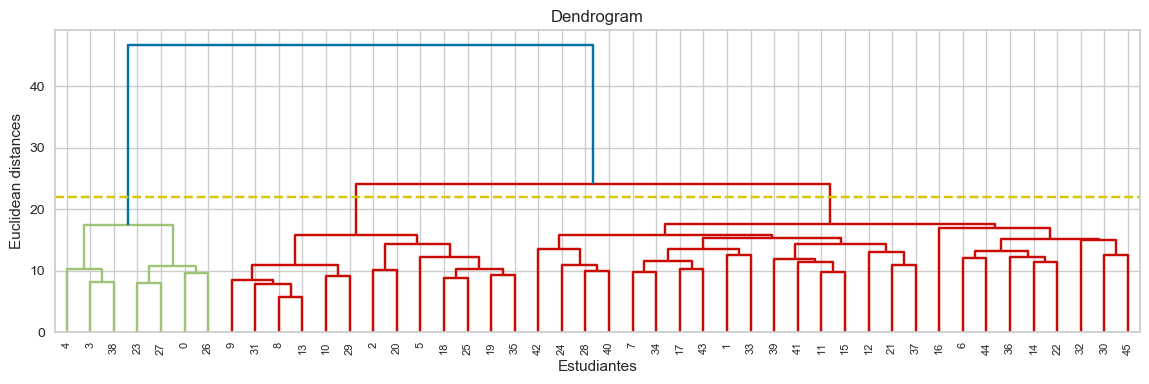

In [180]:
figure(num=None, figsize=(14, 4), dpi=100, facecolor='w', edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.axhline(y=22, color='y', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Estudiantes')
plt.ylabel('Euclidean distances')
plt.show()

Ahora, queremos agrupar los puntos de datos en estos tres clústeres. Para hacerlo, utilizaremos AgglomerativeClustering

In [181]:
# Ajustando Clustering Jerárquico al conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc #muestra las tres etiquetas de datos de los grupos

array([1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

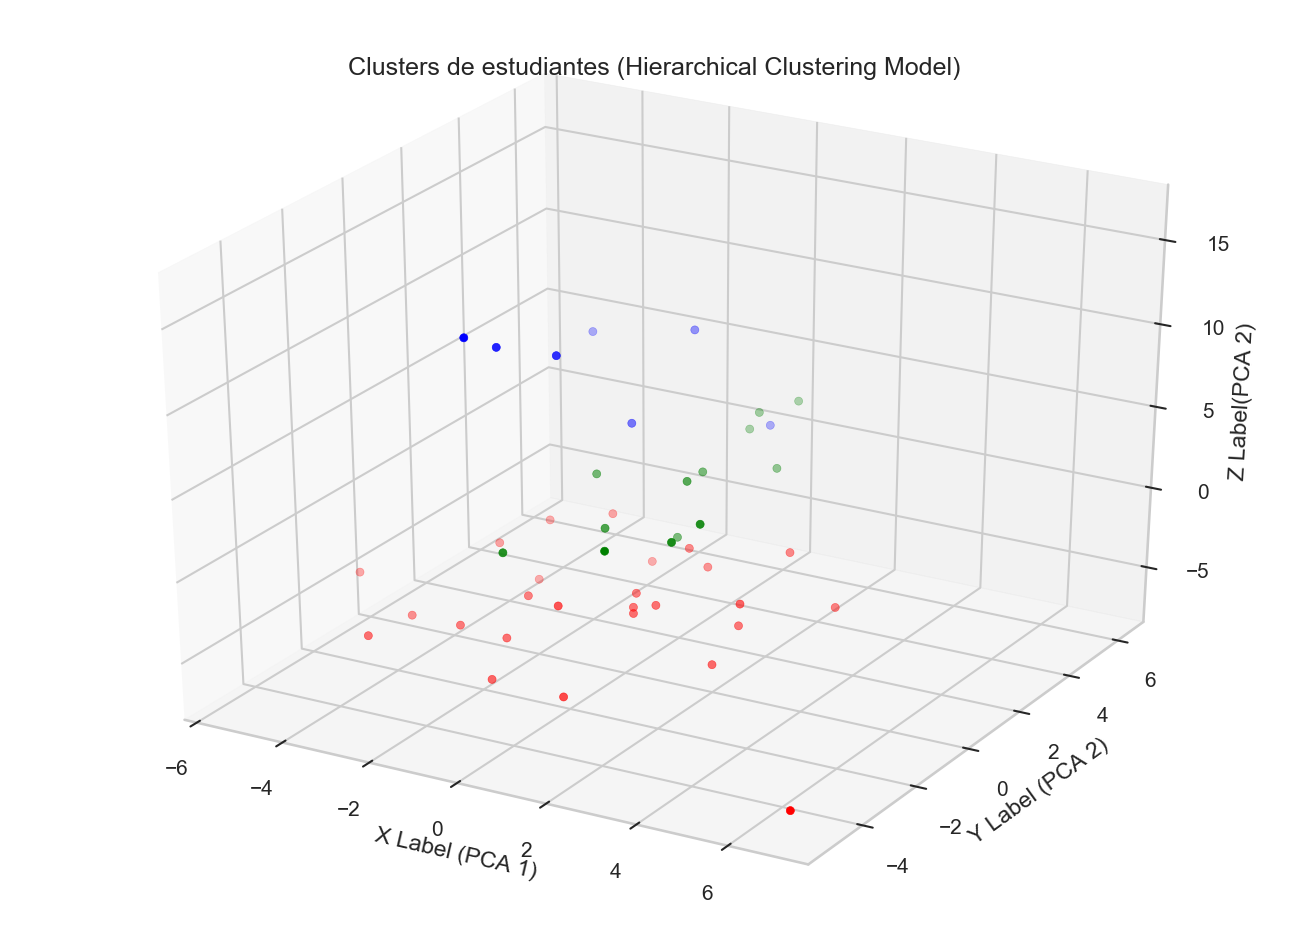

In [197]:
#se visualizan los tres grupos de estudiantes similares según las palabras utilizadas por ellos
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca.fit(X)

Xx = np.dot(X,pca.components_[0])
Xy = np.dot(X,pca.components_[1])
Xz = np.dot(X,pca.components_[2])
    
pcadf = np.vstack((Xx, Xy,Xz)).T

fig = plt.figure(num=None, figsize=(11,8), dpi=150, facecolor='w', edgecolor='g')
ax = fig.add_subplot(111, projection='3d')

eje_x =2
eje_y =1
eje_z =0

ax.scatter(pcadf[y_hc==0, eje_x], pcadf[y_hc==0, eje_y],pcadf[y_hc==0, eje_z], c='red', label ='Cluster 1',s=15)
ax.scatter(pcadf[y_hc==1, eje_x], pcadf[y_hc==1, eje_y],pcadf[y_hc==1, eje_z], c='blue', label ='Cluster 2',s=15)
ax.scatter(pcadf[y_hc==2, eje_x], pcadf[y_hc==2, eje_y],pcadf[y_hc==2, eje_z], c='green', label ='Cluster 3',s=15)

ax.set_xlabel('X Label (PCA 1)')
ax.set_ylabel('Y Label (PCA 2)')
ax.set_zlabel('Z Label(PCA 2)')
plt.title('Clusters de estudiantes (Hierarchical Clustering Model)')
plt.show()

